IMPORTING GEORASTER PACKAGE

In [1]:
import georasters as gr
import numpy as np


READING THE .tif FILE

In [3]:
multi=gr.from_file('IoS2022_MBES_1m_ENZ_ETRS89UTM29N_ODM_Float.tif')

PLOTTING THE DATA FROM .tif


<AxesSubplot:>

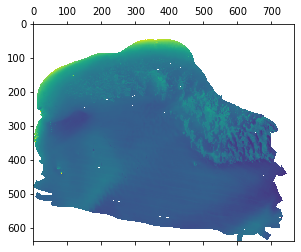

In [4]:
multi.plot()

EXTRACTING THE VALUES FROM TIF AND CREATING A DATABASE

In [13]:
multi_data=multi.to_pandas()

In [14]:
multi_data.head()

,row,col,value,x,y
0,47,376,-0.612121,695400.0,5537655.0
1,47,377,-0.613855,695401.0,5537655.0
2,47,378,-0.623569,695402.0,5537655.0
3,47,379,-0.633109,695403.0,5537655.0
4,47,380,-0.634497,695404.0,5537655.0


DATABASE FORMATTING

In [15]:
multi_data=multi_data.drop(columns=['row','col'])

In [16]:
multi_data=multi_data.rename(columns={'x':'Easting','y':'Northing'})
multi_data

,value,Easting,Northing
0,-0.612121,695400.0,5537655.0
1,-0.613855,695401.0,5537655.0
2,-0.623569,695402.0,5537655.0
3,-0.633109,695403.0,5537655.0
4,-0.634497,695404.0,5537655.0
...,...,...,...
315216,-2.761241,695635.0,5537063.0
315217,-2.771822,695636.0,5537063.0
315218,-2.756731,695637.0,5537063.0
315219,-2.739733,695638.0,5537063.0


ODN TO CHART DATUM

In [17]:
multi_data['Chart Datum']=multi_data['value']+2.91
multi_data

,value,Easting,Northing,Chart Datum
0,-0.612121,695400.0,5537655.0,2.297879
1,-0.613855,695401.0,5537655.0,2.296145
2,-0.623569,695402.0,5537655.0,2.286431
3,-0.633109,695403.0,5537655.0,2.276891
4,-0.634497,695404.0,5537655.0,2.275504
...,...,...,...,...
315216,-2.761241,695635.0,5537063.0,0.148759
315217,-2.771822,695636.0,5537063.0,0.138178
315218,-2.756731,695637.0,5537063.0,0.153269
315219,-2.739733,695638.0,5537063.0,0.170267


In [18]:
multi_data=multi_data.drop(columns='value')
multi_data

,Easting,Northing,Chart Datum
0,695400.0,5537655.0,2.297879
1,695401.0,5537655.0,2.296145
2,695402.0,5537655.0,2.286431
3,695403.0,5537655.0,2.276891
4,695404.0,5537655.0,2.275504
...,...,...,...
315216,695635.0,5537063.0,0.148759
315217,695636.0,5537063.0,0.138178
315218,695637.0,5537063.0,0.153269
315219,695638.0,5537063.0,0.170267


CORRCTING THE SYSTAMATIC ERROR IN TERMS OF ETRS 89

In [19]:
multi_data['Easting']=multi_data['Easting']+0.02
multi_data['Northing']=multi_data['Northing']-0.66
multi_data


,Easting,Northing,Chart Datum
0,695400.02,5537654.34,2.297879
1,695401.02,5537654.34,2.296145
2,695402.02,5537654.34,2.286431
3,695403.02,5537654.34,2.276891
4,695404.02,5537654.34,2.275504
...,...,...,...
315216,695635.02,5537062.34,0.148759
315217,695636.02,5537062.34,0.138178
315218,695637.02,5537062.34,0.153269
315219,695638.02,5537062.34,0.170267


SAVING THE FILE 

In [20]:
multi_data.to_csv('multifinal_chartdatum.csv',index=False)
multi_data.to_csv('multifinal_etrs89_cd.txt',index=False)